In [63]:
##Predict if patients are susceptible in going through Deep sleep

In [64]:
# import file

import csv

file_path = "datasets\\data2.csv"

with open(file_path, 'r') as csv_file:
    reader = csv.reader(csv_file)

In [65]:
# import packages

import datetime
import os
import collections

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from mlxtend.plotting import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import (accuracy_score, auc, classification_report,
                             confusion_matrix, f1_score, precision_recall_curve,
                             precision_score, recall_score, roc_auc_score,
                             roc_curve, mean_squared_error, r2_score)
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import (cross_validate, train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RepeatedKFold

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [66]:
dataset_file = file_path
df = pd.read_csv(dataset_file)
df.shape

(452, 13)

In [67]:
pd.set_option('display.max_columns', None)
print(df.head(5))
print(df.tail(5))

   Unnamed: 0  Age  Gender  Sleep duration  Sleep efficiency  \
0           0   65       1             6.0              0.88   
1           1   69       0             7.0              0.66   
2           2   40       1             8.0              0.89   
3           3   40       1             6.0              0.51   
4           4   57       0             8.0              0.76   

   REM sleep percentage  Deep sleep percentage  Light sleep percentage  \
0                    18                     70                      12   
1                    19                     28                      53   
2                    20                     70                      10   
3                    23                     25                      52   
4                    27                     55                      18   

   Awakenings  Caffeine consumption  Alcohol consumption  Smoking status  \
0         0.0                   0.0                  0.0               1   
1         3.0     

In [68]:
# features extracted for the models

X_df = df.drop(['Unnamed: 0', 'Age', 'Gender', 'REM sleep percentage', 'Deep sleep percentage'], axis = 1)
y_df = df['Light sleep percentage']

In [69]:
# splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 50)

In [70]:
X_train.shape, X_test.shape

((361, 8), (91, 8))

In [71]:
Counter(y_train), Counter(y_test)

(Counter({20: 45,
          15: 41,
          17: 39,
          18: 33,
          10: 25,
          12: 23,
          13: 22,
          45: 16,
          21: 14,
          47: 14,
          52: 11,
          19: 10,
          53: 10,
          16: 9,
          48: 8,
          55: 8,
          54: 7,
          50: 5,
          14: 3,
          22: 3,
          7: 3,
          51: 3,
          56: 2,
          11: 2,
          30: 1,
          40: 1,
          63: 1,
          46: 1,
          62: 1}),
 Counter({18: 12,
          13: 10,
          10: 9,
          15: 8,
          20: 7,
          17: 7,
          52: 5,
          55: 5,
          12: 5,
          45: 4,
          21: 3,
          16: 3,
          53: 3,
          47: 2,
          50: 2,
          48: 2,
          54: 1,
          22: 1,
          19: 1,
          56: 1}))

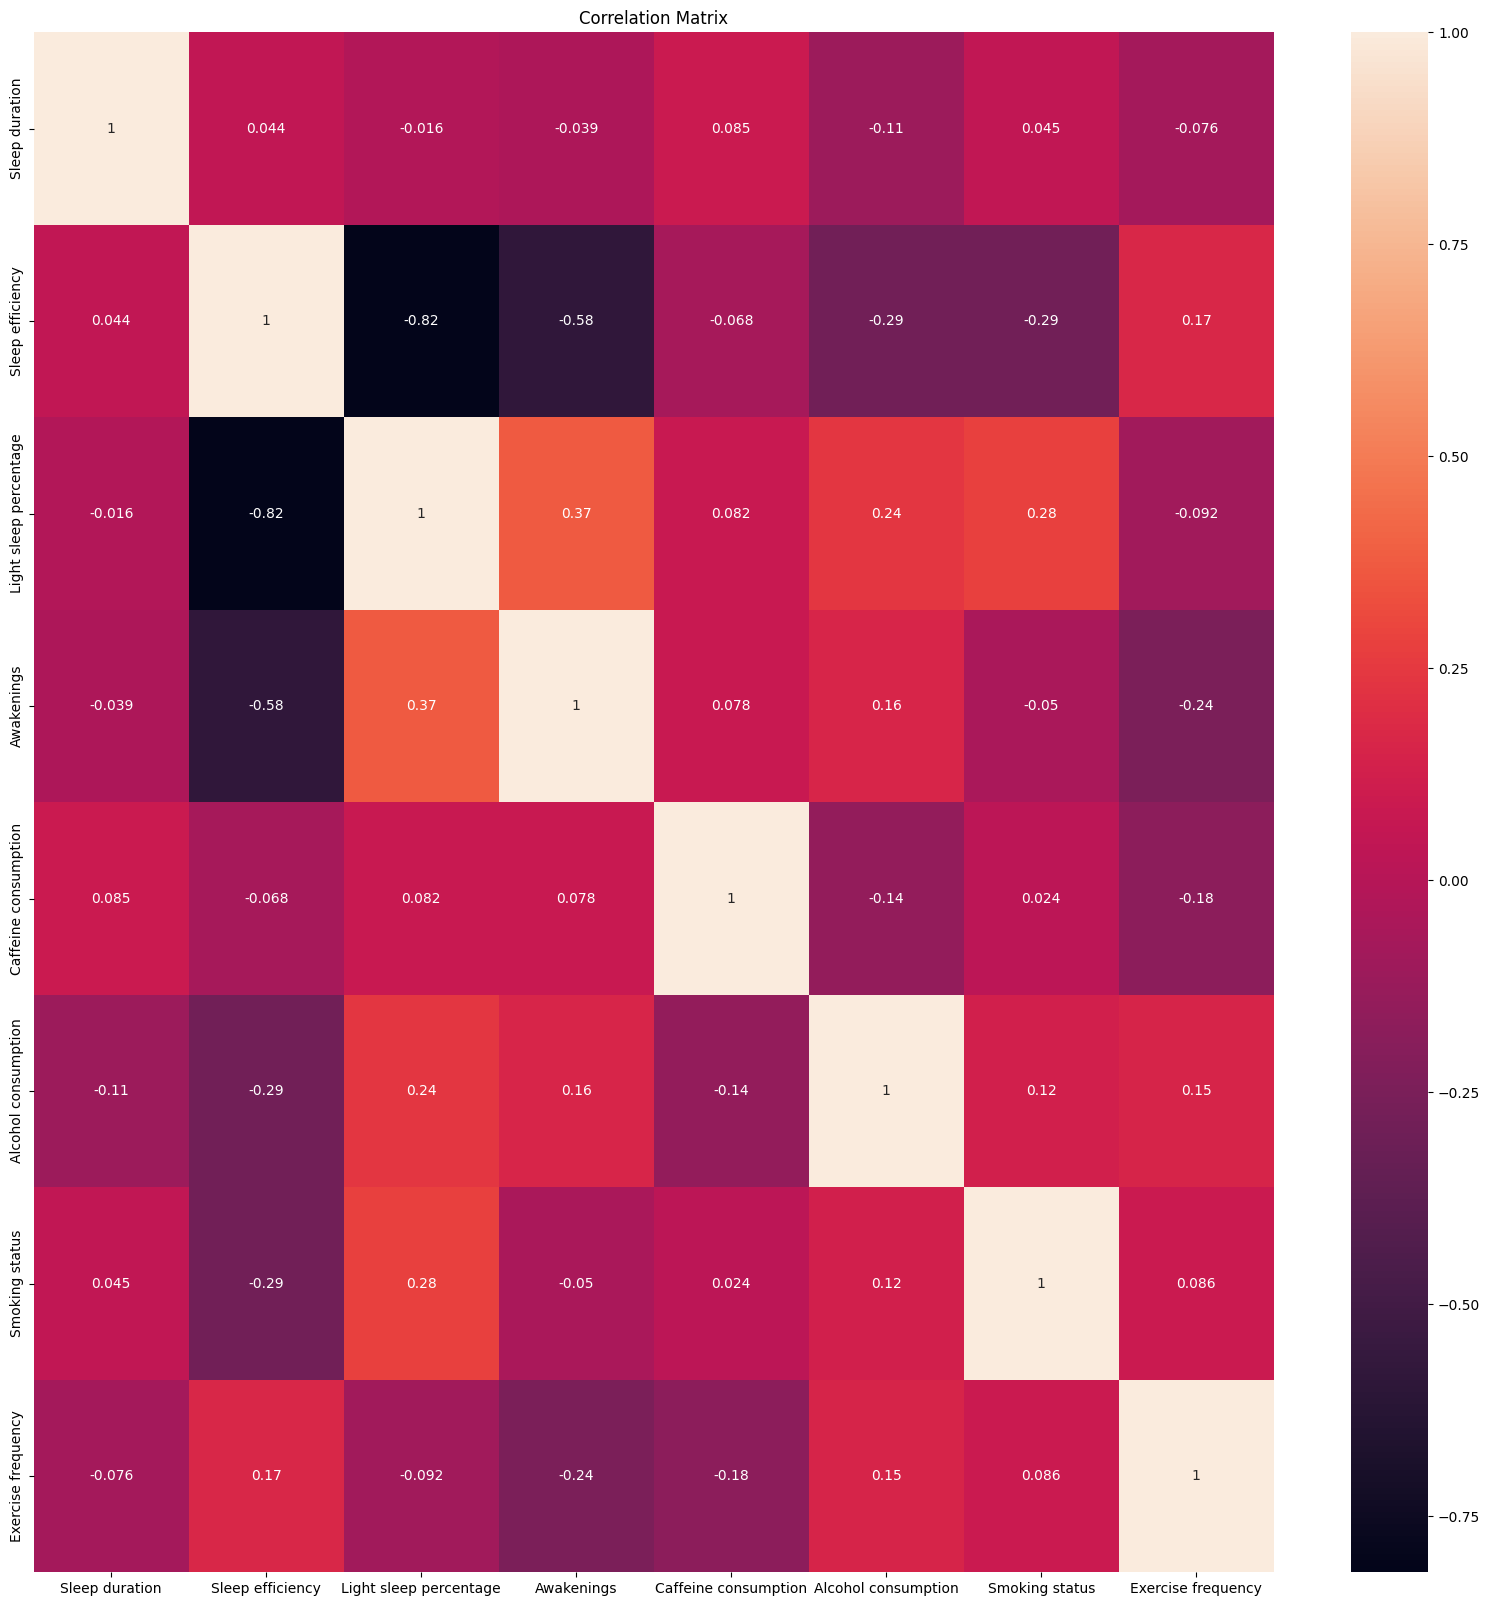

In [72]:
# performing a correlation matrix

corr_matrix = X_test.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [73]:
# linear regression

li_model = LinearRegression()

li_model.fit(X_train, y_train)

LinearRegression()

In [74]:
y_pred = li_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.00
R-squared: 1.00


In [ ]:
# cross-validation on linear regression using nested cross validation



In [75]:
# ridge regression and lasso regression

ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
ridge_model.fit(X_train, y_train)


lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
lasso_model.fit(X_train, y_train)

Lasso()

In [76]:
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Ridge Regression:")
print(f"Mean Squared Error: {mse_ridge:.2f}")
print(f"R-squared: {r2_ridge:.2f}")

print("\nLasso Regression:")
print(f"Mean Squared Error: {mse_lasso:.2f}")
print(f"R-squared: {r2_lasso:.2f}")

Ridge Regression:
Mean Squared Error: 0.00
R-squared: 1.00

Lasso Regression:
Mean Squared Error: 0.01
R-squared: 1.00


In [81]:
# elasticnet regression

en_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust the alpha and l1_ratio parameters
en_model.fit(X_train, y_train)

y_pred_en = en_model.predict(X_test)

mse_elasticnet = mean_squared_error(y_test, y_pred_en)
r2_elasticnet = r2_score(y_test, y_pred_en)

print("ElasticNet Regression:")
print(f"Mean Squared Error: {mse_elasticnet:.2f}")
print(f"R-squared: {r2_elasticnet:.2f}")

ElasticNet Regression:
Mean Squared Error: 0.01
R-squared: 1.00
